Import Python Packages

In [ ]:
!pip install pingouin

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import itertools

from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split, StratifiedKFold

import statsmodels.api as sm

from sklearn import preprocessing
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              ExtraTreesClassifier, BaggingClassifier,
                              GradientBoostingClassifier, GradientBoostingClassifier)


import pingouin as pg

import warnings
warnings.filterwarnings('ignore')

Load and read diabetes dataset

Check data information

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Check data description

In [ ]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
## Since there are some columns that make no senses to have 0,
## we should mark these 0s as nan
na_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[na_cols] =df[na_cols].apply(lambda x: x.replace(0, np.nan))
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Analysis of missing values

In [ ]:
((df.isnull().sum() / df.shape[0])*100).to_frame().rename({0: 'Missing Values percentage'}, axis = 1).style.background_gradient('gist_heat_r')

In [ ]:
missing_val_df = ((df.isnull().sum() / df.shape[0])*100).to_frame().reset_index().rename({'index': 'columns', 0: 'Missing Values percentage'}, axis = 1)

plt.figure(figsize = (10,8))
sns.barplot(data = missing_val_df, x = 'Missing Values percentage', y = 'columns',palette='dark')
plt.title('Missing Values percentage', fontsize = 20, fontweight = 'bold', color = 'Blue')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'navy');

Missing value imputation

Split the data

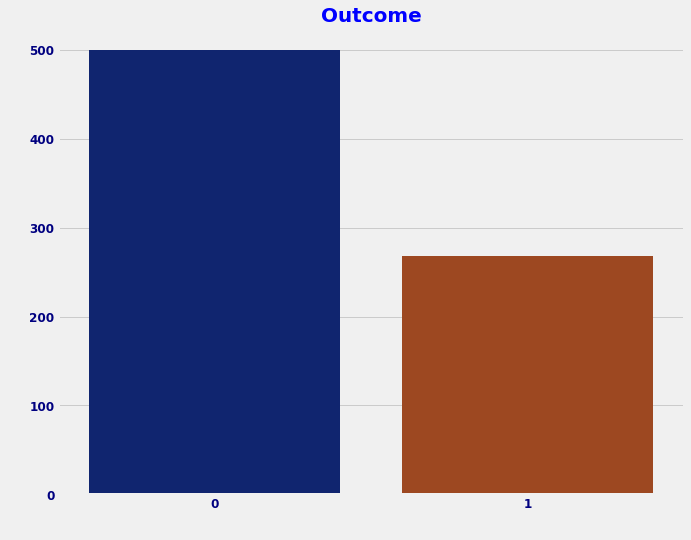

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(data = df, x = 'Outcome', palette='dark')
plt.title('Outcome', fontsize = 20, fontweight = 'bold', color = 'blue')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'navy');

In [ ]:
## Imputing BMI using Iterative Imputer
it_imputer = IterativeImputer(max_iter=100)
iterimp = it_imputer.fit_transform(df)

## Create train test imputed dataframe
df_eda = pd.DataFrame(iterimp, columns=df.columns)

In [ ]:
df_eda.isnull().sum()
## no variables have NaN values 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Exploratory data analysis

Research question: It seems that people tested positive and have higher diabetesfunctions usually have higher glucose

Univariate analysis

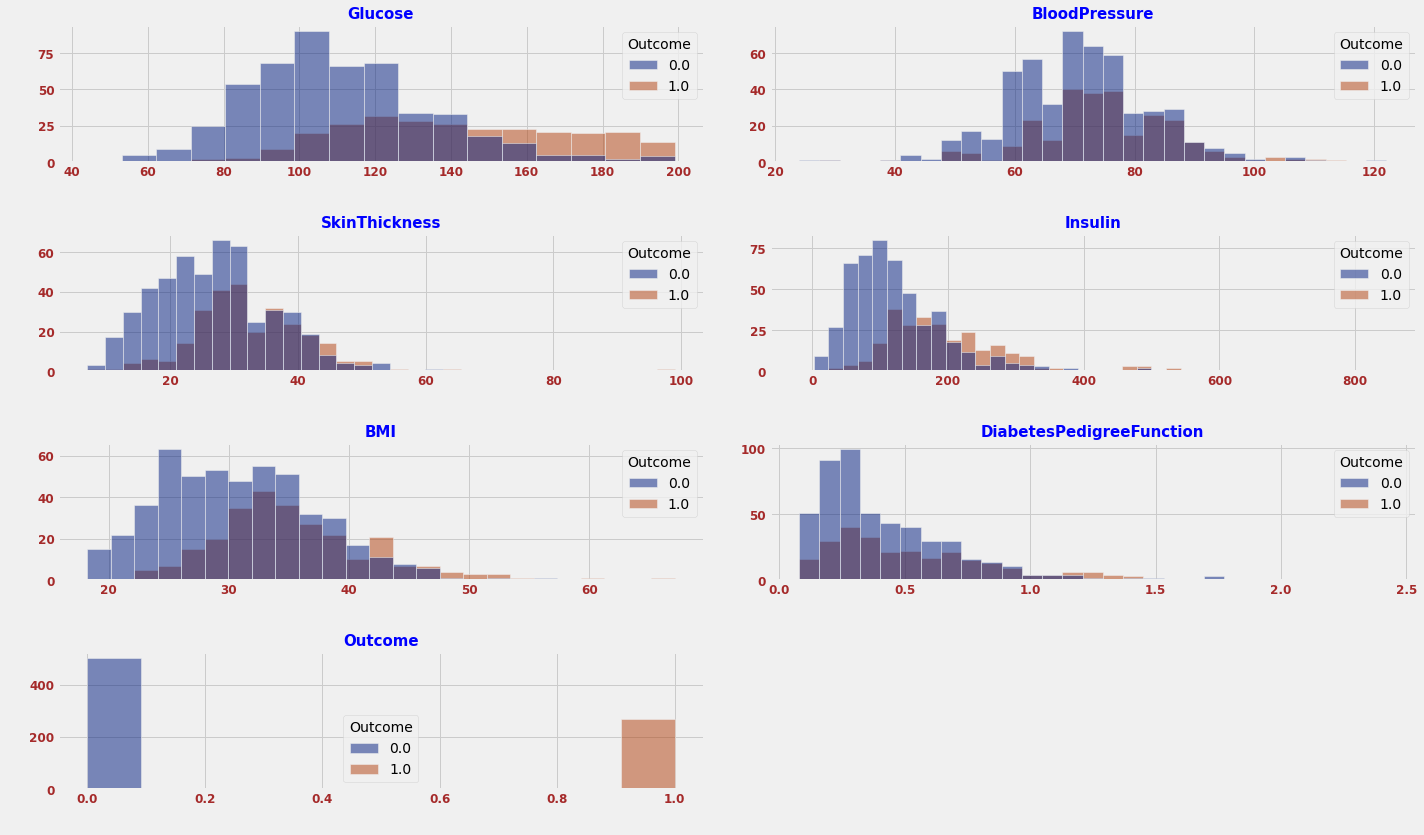

In [ ]:
plt.figure(figsize = (20,20))

for i,col in enumerate(df_eda.drop(['Pregnancies', 'Age'], axis = 1)):
  plt.subplot(7,2,i+1)
  sns.histplot(x = col,  data = df_eda, hue = 'Outcome', palette = 'dark' )
  plt.xticks(rotation = 0)
  plt.title(col, fontsize = 15, fontweight = 'bold', color = 'blue')
  plt.xlabel(" ")
  plt.ylabel(" ")
  plt.xticks(fontsize = 12, fontweight = 'bold', color = 'brown')
  plt.yticks(fontsize = 12, fontweight = 'bold', color = 'brown')
  plt.tight_layout();

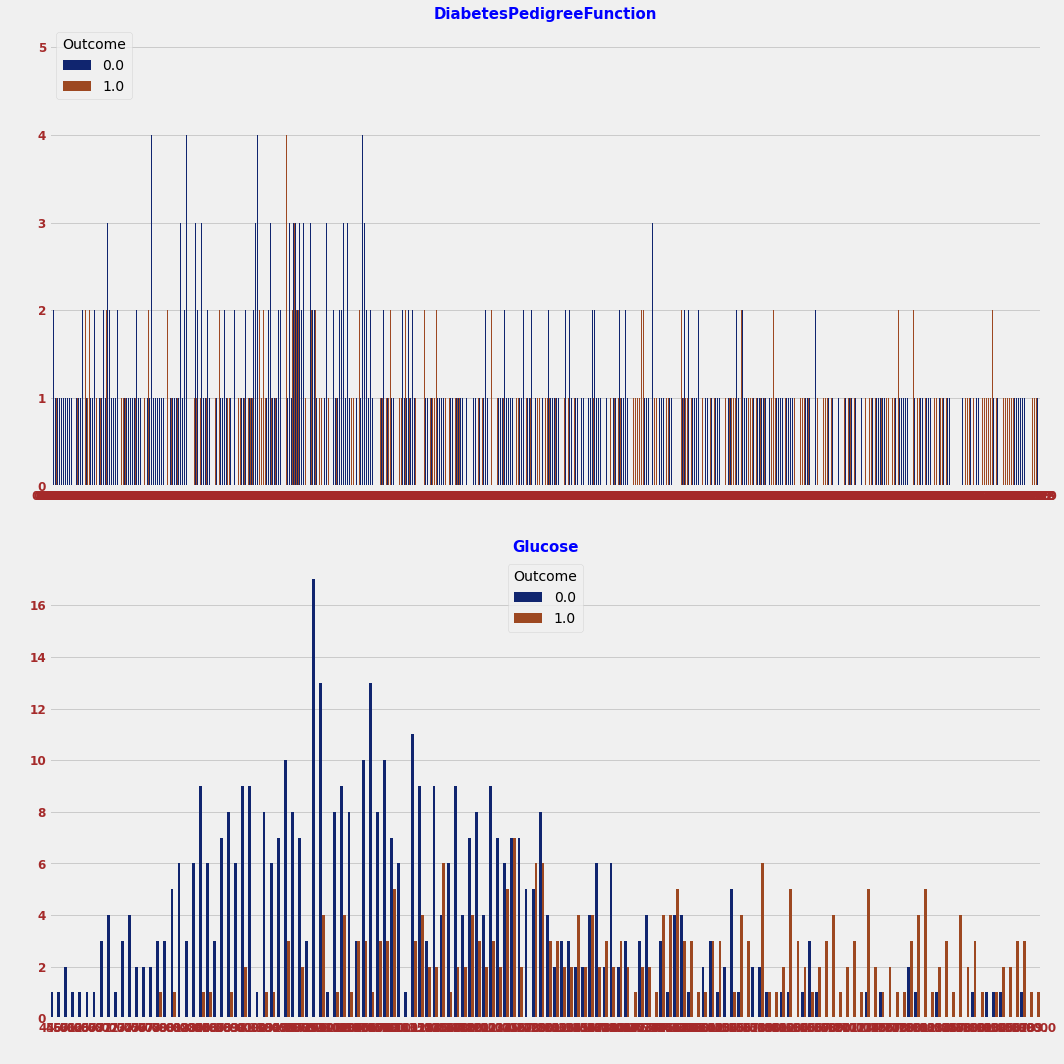

In [ ]:
## Count plots of DiabetesPedigreeFunction and Glucose with hue as Outcome
plt.figure(figsize = (15,15))
for i,col in enumerate(['DiabetesPedigreeFunction', 'Glucose']):
  plt.subplot(2,1,i+1)
  sns.countplot(x = col,  data = df_eda, hue = 'Outcome', palette = 'dark' )
  plt.xticks(rotation = 0)
  plt.title(col, fontsize = 15, fontweight = 'bold', color = 'blue')
  plt.xlabel(" ")
  plt.ylabel(" ")
  plt.xticks(fontsize = 12, fontweight = 'bold', color = 'brown')
  plt.yticks(fontsize = 12, fontweight = 'bold', color = 'brown')
  plt.tight_layout();

In [ ]:
a,b = df_eda.groupby('Outcome')['DiabetesPedigreeFunction'].mean()


c,d = df_eda.groupby('Outcome')['DiabetesPedigreeFunction'].std()

e,f = df_eda.groupby('Outcome')['DiabetesPedigreeFunction'].size()

In [ ]:
# two sample student t test
from scipy import stats
mean1 = a
mean2 = b

std1 = c
std2 = d

nobs1 = e
nobs2 = f

modified_std1 = np.sqrt(np.float32(nobs1)/np.float32(nobs1-1)) * std1
modified_std2 = np.sqrt(np.float32(nobs2)/np.float32(nobs2-1)) * std2

(statistic, pvalue) = stats.ttest_ind_from_stats(mean1=mean1, std1=modified_std1, nobs1=e, mean2=mean2, std2=modified_std2, nobs2=f)

print( "t statistic is: ", statistic)
print("pvalue is: ", pvalue)

## reject null hypothesis

t statistic is:  -4.87901674414389
pvalue is:  1.29734732391856e-06


In [ ]:
a3,b3 = df_eda.groupby('Outcome')['Glucose'].mean()

c3,d3 = df_eda.groupby('Outcome')['Glucose'].std()

e3,f3 = df_eda.groupby('Outcome')['Glucose'].size()

In [ ]:
# two sample student t test
from scipy import stats
mean1 = a3
mean2 = b3

std1 = c3
std2 = d3

nobs1 = e3
nobs2 = f3

modified_std1 = np.sqrt(np.float32(nobs1)/np.float32(nobs1-1)) * std1
modified_std2 = np.sqrt(np.float32(nobs2)/np.float32(nobs2-1)) * std2

(statistic, pvalue) = stats.ttest_ind_from_stats(mean1=mean1, std1=modified_std1, nobs1=e3, mean2=mean2, std2=modified_std2, nobs2=f3)

print( "t statistic is: ", statistic)
print("pvalue is: ", pvalue)

## reject null hypothesis

t statistic is:  -15.809037879895538
pvalue is:  6.222856899198439e-49


In [ ]:
## Correlation Matrix
corr_matrix=df_eda.corr()
 
matrix = np.tril(corr_matrix)

plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix.T, mask=matrix, square=True, cmap = 'RdBu', annot = True);

Bivariate analysis

In [ ]:
plt.figure(figsize = (25,50))

for i,col in enumerate(df_eda.drop(['Outcome'], axis =1).columns):
  plt.subplot(5,2,i+1)
  sns.boxenplot(x = 'Outcome',y = col,  data = df_eda,palette = 'dark')
  plt.xticks(rotation = 0)
  plt.title(f'{col} vs Outcome', fontsize = 20, fontweight = 'bold', color = 'blue')
  plt.xlabel(" ")
  plt.ylabel(" ")
  # plt.legend(['No-Purchase', 'Purchase'])
  plt.xticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.yticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.tight_layout();
plt.show()

Outlier treatments

In [ ]:
## Creating a list of Outliers columns
outliers_cols = []
for col in df_eda.drop(['Outcome'], axis = 1).columns:
  q25, q75 = np.percentile(df_eda[col], 25), np.percentile(df_eda[col], 75)
  iqr = q75 - q25
  outlier_th = iqr*1.5
  lower_th = q25 - outlier_th
  upper_th = q75 - outlier_th 
  if any(df_eda[col].values < lower_th) or any(df_eda[col].values > upper_th):
    outliers_cols.append(col)

print(outliers_cols)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


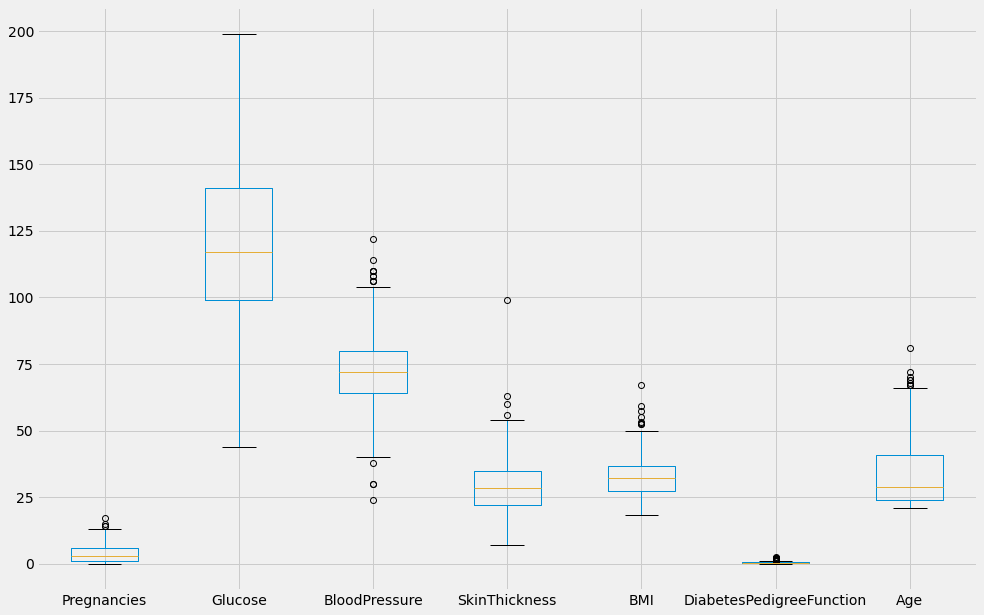

In [ ]:
df_eda.boxplot(column=['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age'], figsize=(15,10)) 

In [ ]:
# In pregnancy, we noticed that few observations have outliers so no need 


#Glucose is fine



#SkinThickness has outliers problems.
#From the distribution plot we noticed that most of the observations of this feature are located around the mean. 
#Need to exclude the extreme outliers

df_eda = df_eda.loc[df_eda['BloodPressure'] <= 110]
df_eda = df_eda.loc[df_eda['BloodPressure'] >= 40]
#BMI
#From the distribution plot we noticed that there are very extreme outliers on the right side. 

df_eda = df_eda.loc[df_eda['BMI'] <=50 ]

#DiabetesPedigreeFunction
#From distribution plot, extreme outliers on the right side. 

df_eda = df_eda.loc[df_eda['DiabetesPedigreeFunction'] <= 1.2]

#Age
#Even though the plot is very right skewed, we would do nothing to this variable. 80 years old still makes sense

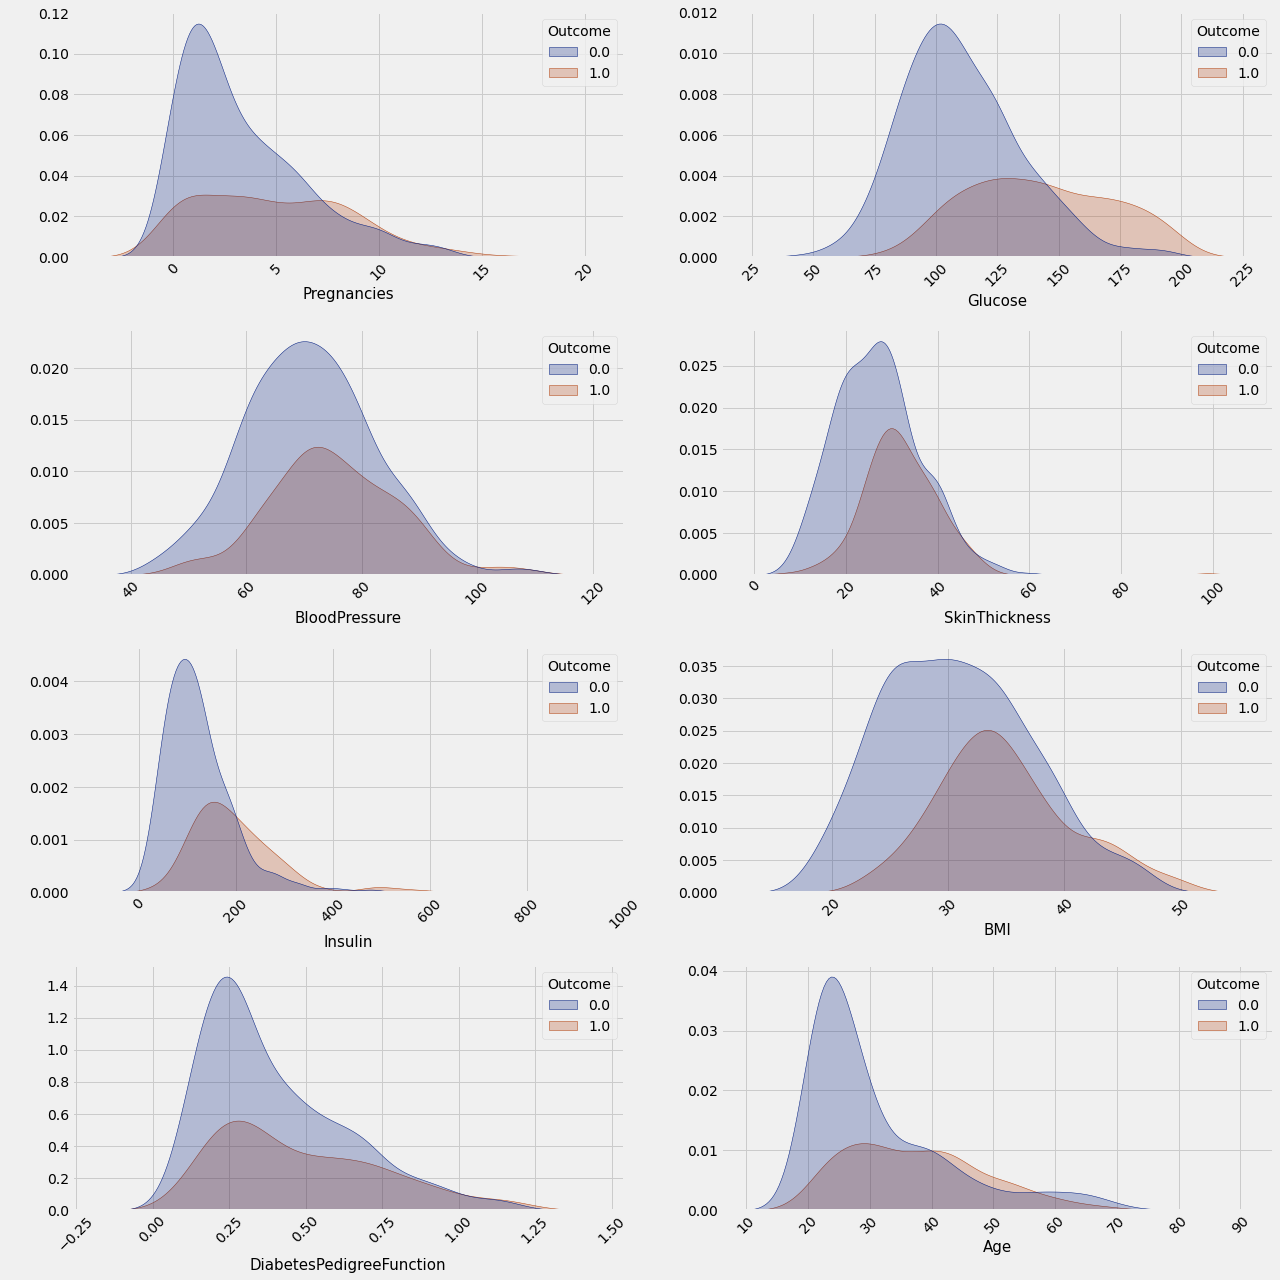

In [ ]:
plt.figure(figsize = (18,18))
for i in enumerate(df_eda.drop(['Outcome'], axis = 1).columns):
  plt.subplot(4,2,i[0]+1)
  sns.kdeplot(data = df_eda, x = i[1], hue = 'Outcome', fill = 'dark', palette = 'dark' )
  plt.xlabel(i[1],fontsize = 15)
  plt.ylabel(" ")
  plt.xticks(rotation = 45)  
  plt.tight_layout()

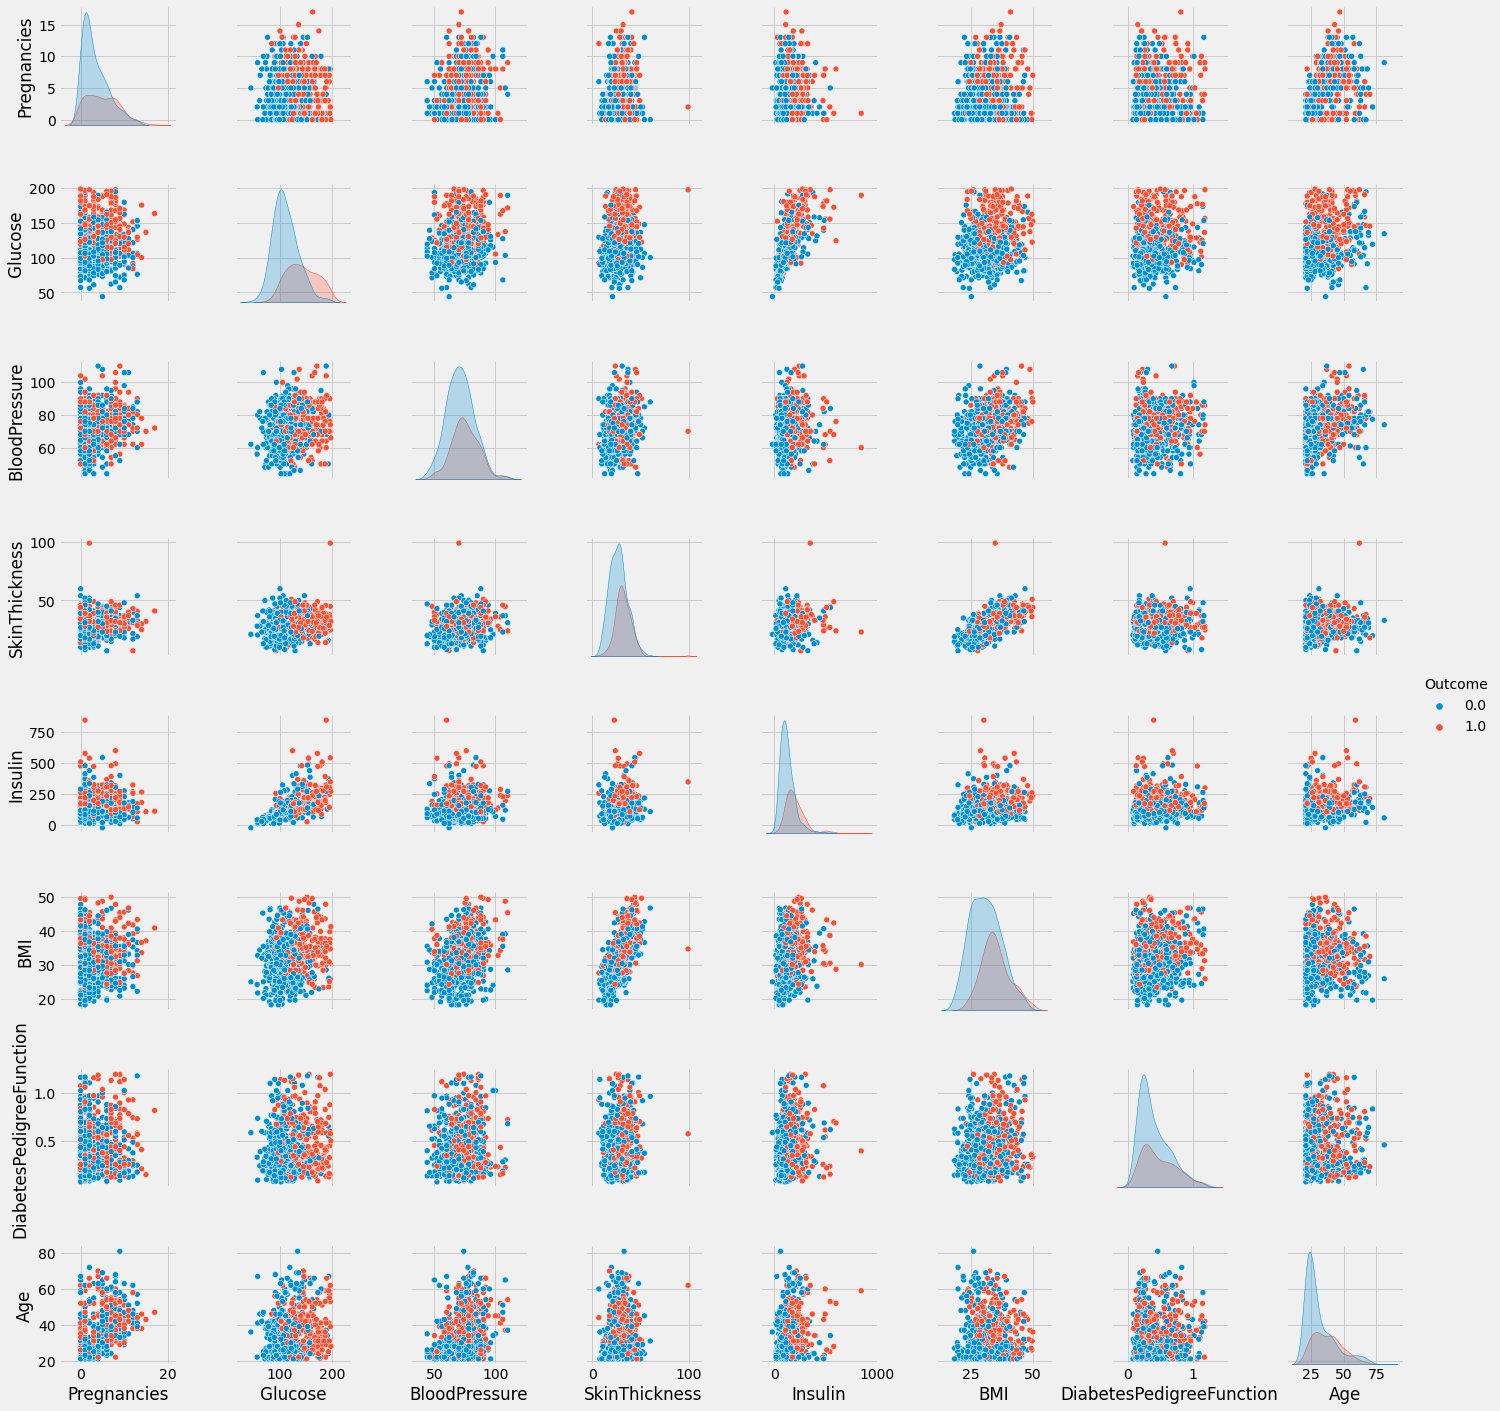

In [ ]:
sns.pairplot(df_eda, hue = 'Outcome')

QQ Plots

In [ ]:
## We'll check if the distribution is Normal or not using QQ plots. 

col_num = df_eda.columns
fig, axs = plt.subplots(len(col_num), 2,
                        figsize=(15, len(df_eda.columns)*6))

for i, col in enumerate(col_num):
    sns.histplot(df_eda[col], ax=axs[i, 0])
    sm.qqplot(df_eda[col].dropna(), line="s", ax=axs[i, 1], fmt='b')
    axs[i, 1].set_title(col)    
    plt.tight_layout()

Model building

Multiple linear regression

In [ ]:
df_eda.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   727.000000  727.000000     727.000000     727.000000  727.000000   
mean      3.881706  121.104933      72.300256      28.657049  150.579553   
std       3.352526   30.123849      11.376480       9.329635   92.958187   
min       0.000000   44.000000      44.000000       7.000000  -19.501719   
25%       1.000000   99.000000      64.000000      22.183963   90.000000   
50%       3.000000  117.000000      72.000000      28.082163  130.000000   
75%       6.000000  140.000000      80.000000      34.289074  188.142565   
max      17.000000  198.000000     110.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  727.000000                727.000000  727.000000  727.000000  
mean    32.144626                  0.429663   33.302613    0.337001  
std      6.430110                  0.250213   11.844692    0.473011  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.238000   24.000000    0.000000  
50%     32.000000                  0.356000   29.000000    0.000000  
75%     36.150000                  0.587500   41.000000    1.000000  
max     50.000000                  1.191000   81.000000    1.000000

In [ ]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
mlregression=smf.ols('Glucose~Pregnancies+BMI+BloodPressure+SkinThickness+DiabetesPedigreeFunction+Age+Outcome',data=df_eda)
m=mlregression.fit()
print(m.summary())


                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     43.81
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           1.27e-51
Time:                        15:18:34   Log-Likelihood:                -3377.6
No. Observations:                 727   AIC:                             6771.
Df Residuals:                     719   BIC:                             6808.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [ ]:
import statsmodels.formula.api as smf
mlregression=smf.ols('Glucose~Outcome+Age+Age:Outcome',data=df_eda)
dd=mlregression.fit()
print(dd.summary())

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     94.86
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           8.92e-52
Time:                        15:20:36   Log-Likelihood:                -3386.1
No. Observations:                 727   AIC:                             6780.
Df Residuals:                     723   BIC:                             6799.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      96.3395      3.314     29.067      

In [ ]:
import statsmodels.formula.api as smf
mlregression=smf.ols('Glucose~Outcome+Age',data=df_eda)
new=mlregression.fit()
print(new.summary())

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     142.3
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           7.34e-53
Time:                        15:18:42   Log-Likelihood:                -3386.2
No. Observations:                 727   AIC:                             6778.
Df Residuals:                     724   BIC:                             6792.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     97.1345      2.830     34.320      0.0

In [ ]:
mlregression=smf.ols('Glucose~Outcome',data=df_eda)
new2=mlregression.fit()
print(new2.summary())

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     250.4
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           1.16e-48
Time:                        06:27:29   Log-Likelihood:                -3398.9
No. Observations:                 727   AIC:                             6802.
Df Residuals:                     725   BIC:                             6811.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    110.2314      1.184     93.118      0.0

In [ ]:
aov = pg.anova(data=df_eda, dv='Glucose',between='Outcome',detailed=True)
print(aov)

    Source             SS   DF             MS           F         p-unc  \
0  Outcome  169103.754883    1  169103.754883  250.356668  1.164085e-48   
1   Within  489702.245498  725     675.451373         NaN           NaN   

        np2  
0  0.256682  
1       NaN  


In [ ]:
#post hoc test with pingouin
#cohen = effect size
pt = pg.pairwise_tukey(dv='Glucose',between='Outcome',effsize='cohen',data=df_eda)
print(pt)

     A    B     mean(A)    mean(B)       diff       se          T  p-tukey  \
0  0.0  1.0  110.231443  142.49686 -32.265416  2.03919 -15.822663      0.0   

      cohen  
0 -1.241481  


In [ ]:
##pt2 = pg.pairwise_tukey(dv='Glucose',between='Age',effsize='cohen',data=df_eda)
##print(pt2)

In [ ]:
pt2 = pg.pairwise_tukey(dv='Glucose',between='Age',effsize='cohen',data=df_eda)
print(pt2)

         A     B     mean(A)     mean(B)       diff         se         T  \
0     21.0  22.0  109.971539  108.670896   1.300643   5.006412  0.259795   
1     21.0  23.0  109.971539  110.135135  -0.163596   5.935969 -0.027560   
2     21.0  24.0  109.971539  118.800000  -8.828461   5.597913 -1.577099   
3     21.0  25.0  109.971539  104.050000   5.921539   5.795756  1.021703   
4     21.0  26.0  109.971539  119.166667  -9.195127   6.352424 -1.447499   
...    ...   ...         ...         ...        ...        ...       ...   
1321  69.0  72.0  134.000000  119.000000  15.000000  34.889117  0.429933   
1322  69.0  81.0  134.000000  134.000000   0.000000  34.889117  0.000000   
1323  70.0  72.0  145.000000  119.000000  26.000000  40.286482  0.645378   
1324  70.0  81.0  145.000000  134.000000  11.000000  40.286482  0.273044   
1325  72.0  81.0  119.000000  134.000000 -15.000000  40.286482 -0.372333   

       p-tukey     cohen  
0     1.000000  0.045658  
1     1.000000 -0.005743  
2     

In [ ]:
X = df_eda[['Outcome','Age']]
y = df_eda['Glucose']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
y_pred = new.predict(X_test)

In [ ]:
df_pred = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_pred

Actual   Predicted
605   124.0  105.949971
528   117.0  106.369757
624   108.0  105.949971
487   173.0  121.482066
525    87.0  105.949971
..      ...         ...
423   115.0  105.949971
553    88.0  106.789544
293   128.0  136.854588
104    85.0  108.468689
669   154.0  116.024844

[146 rows x 2 columns]

In [ ]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 21.69806076270862
MSE: 718.040129519209
RMSE: 26.796270813663774


ANOVA modeling

In [ ]:
!pip install dfply

     |████████████████████████████████| 612 kB 11.2 MB/s 


In [ ]:
from dfply import *

In [ ]:
#Anova table
anv=sm.stats.anova_lm(new, typ=2)
anv
## We now find that 

sum_sq     df           F        PR(>F)
Outcome   133885.144568    1.0  204.989063  4.013252e-41
Age        16833.871961    1.0   25.774029  4.885687e-07
Residual  472868.373537  724.0         NaN           NaN

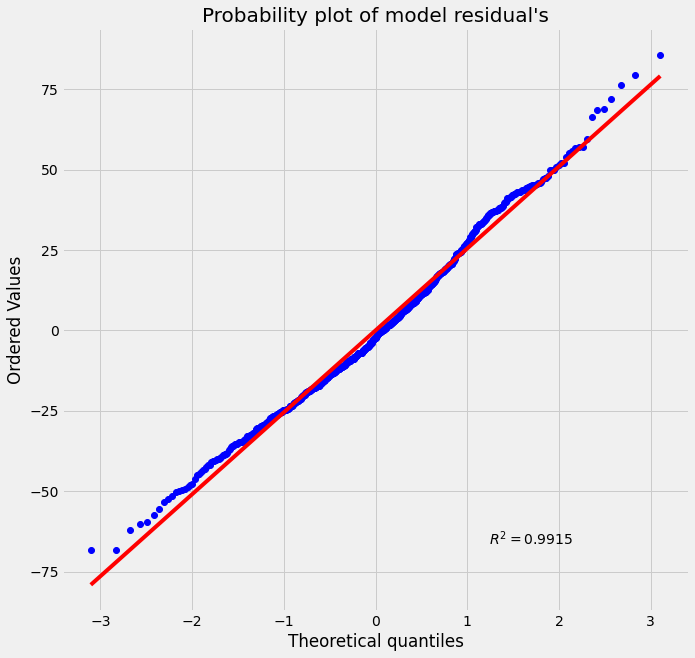

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(new.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

ANCOVA analysis

In [ ]:
df_eda >> group_by(X.Outcome) >> summarize(n=X['Glucose'].count(), mean=X['Glucose'].mean(), std=X['Glucose'].std())

Outcome    n        mean        std
0      0.0  482  110.231443  24.263476
1      1.0  245  142.496860  29.093526

In [ ]:
df_eda >> group_by(X.Outcome) >> summarize(n=X['Age'].count(), mean=X['Age'].mean(), std=X['Age'].std())

Outcome    n       mean        std
0      0.0  482  31.199170  11.722615
1      1.0  245  37.440816  10.982175

In [ ]:
fig, axs = plt.subplots(3,1,figsize=(30, 20))
sns.scatterplot(data=df_eda, x="Age", y="Glucose", hue=df_eda.Outcome.tolist(), ax=axs[0])
sns.boxplot(data=df_eda, x="Outcome", y="Glucose", hue=df_eda.Outcome.tolist(), ax=axs[1])
sns.boxplot(data=df_eda, x="Outcome", y="Age", hue=df_eda.Outcome.tolist(), ax=axs[2])
plt.show()


In [ ]:
from pingouin import ancova
ancova(data=df_eda, dv='Glucose', covar='Age', between='Outcome')

Source             SS   DF           F         p-unc       np2
0   Outcome  133885.144568    1  204.989063  4.013252e-41  0.220658
1       Age   16833.871961    1   25.774029  4.885687e-07  0.034376
2  Residual  472868.373537  724         NaN           NaN       NaN

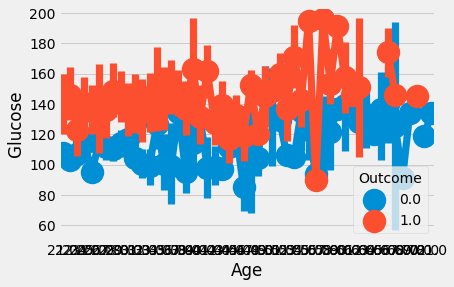

In [ ]:
ax = sns.pointplot(x='Age', y='Glucose', hue='Outcome',data=df_eda)

Power analysis

We first import libraries that we need for the power analysis




In [ ]:
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
from statsmodels.stats.power import TTestIndPower

In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               727 non-null    float64
 1   Glucose                   727 non-null    float64
 2   BloodPressure             727 non-null    float64
 3   SkinThickness             727 non-null    float64
 4   Insulin                   727 non-null    float64
 5   BMI                       727 non-null    float64
 6   DiabetesPedigreeFunction  727 non-null    float64
 7   Age                       727 non-null    float64
 8   Outcome                   727 non-null    float64
dtypes: float64(9)
memory usage: 73.0 KB


Since we can derive from the previous analysis, that our effect size is close to 1.2, we can use this value as effect size.  We can now set our power as 80%, and we can set the significance value at 0.01 in order to see how large our sample size should be in order to conduct our experiment.

In [ ]:
# parameters for the analysis 
effect_size = 1.2
alpha = 0.01 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                              power = power, 
                              alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 17.95


Having done that, it is time to take it a step further. We would like to see how does the power change when we modify the rest of the building blocks. To do so we plot power with respect to the other parameters. I begin the analysis by inspecting how does the sample size influence the power (while keeping the significance level and the effect size at certain levels). I have chosen [0.2, 0.5, 0.8,1.2] as the considered effect size values, as these correspond to the thresholds for small/medium/large, as defined in the case of Cohen’s d. And the 1.2 is our calculating effect size.

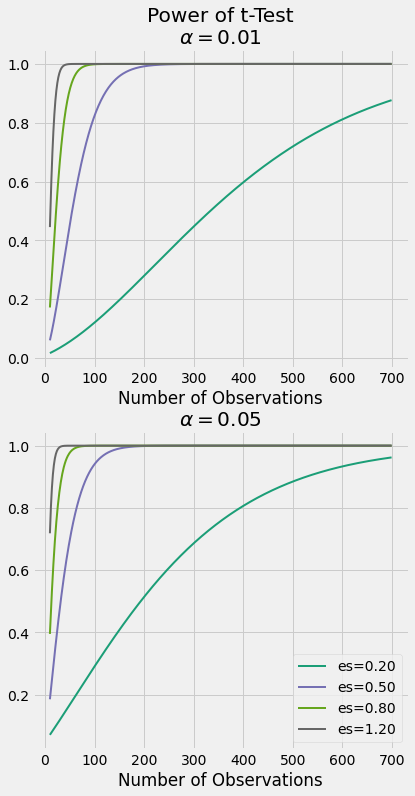

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                  nobs= np.arange(10, 700),
                  effect_size=np.array([0.2, 0.5, 0.8,1.2]),
                  alpha=0.01,
                  ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                 nobs= np.arange(10, 700),
                 effect_size=np.array([0.2, 0.5, 0.8,1.2]),
                 alpha=0.05,
                 ax=ax, title=r'$\alpha = 0.05$') 
fig.subplots_adjust(top = 2.5)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='effect_size',
                  nobs= np.arange(10, 700,100),
                  effect_size=np.array([0.2, 0.5, 0.8,1.2]),
                  alpha=0.01,
                  ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='effect_size',
                 nobs= np.arange(10, 700,100),
                 effect_size=np.array([0.2, 0.5, 0.8,1.2]),
                 alpha=0.05,
                 ax=ax, title=r'$\alpha = 0.05$') 
fig.subplots_adjust(top = 2.5)

In [ ]:
def power_grid(x,y):
    power = TTestIndPower().solve_power(effect_size = x, 
                      nobs1 = y, 
                      alpha = 0.01)
    return power

X,Y = np.meshgrid(np.linspace(0.01, 1, 51), 
                  np.linspace(10, 1000, 100))
X = X.T
Y = Y.T

Z = power_grid(X, Y) # power

data = [Surface(x = X, y= Y, z = Z)]

layout = Layout(
    title='Power Analysis',
    scene = dict(xaxis = dict(title='effect size'),
                 yaxis = dict(title='number of observations'),
                 zaxis = dict(title='power'),)
)

fig = Figure(data=data, layout=layout)
iplot(fig)